In [45]:
from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV, learning_curve, validation_curve
from sklearn.metrics import make_scorer
from sklearn.linear_model import ElasticNet
import sklearn

from sklearn.metrics import confusion_matrix
from sklearn import tree

from sklearn.metrics import make_scorer 
from sklearn.metrics import mean_absolute_error 
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn import linear_model


import numpy as np
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import re


%matplotlib inline
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import nltk
from nltk.corpus import reuters
from nltk.corpus import stopwords
from nltk import word_tokenize
import re
import string

import tensorflow.keras as keras
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers
from tensorflow.keras import Input
from tensorflow.keras import models

In [2]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Fabian\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Fabian\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Fabian\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [3]:
df = pd.read_csv("final_data.csv")
text=df['text'] 
pd.options.display.max_colwidth=500
df

,Symbol,text,Volatility
0,MMM,"About 3M Co3M Co is a technology company. The Company operates through four segments: Safety and Industrial, Transportation and Electronics, Health Care and Consumer. Safety and Industrial segment consist of abrasives, automotive aftermarket, closure and masking systems, communication markets, electrical markets, industrial adhesives and tapes, personal safety, roofing granules and other safety and industrial. Transportation and Electronics segment consists of advanced materials, automotive ...",0.013422
1,ABT,"About Abbott LaboratoriesAbbott Laboratories (Abbott) is engaged in the discovery, development, manufacture, and sale of a diversified line of health care products. The Company operates through four segments: Established Pharmaceutical Products, Diagnostic Products, Nutritional Products, and Medical Devices. The Company focuses on cardiovascular, diabetes care, diagnostics, neuromodulation, nutrition and medicine. It offers products, including FreeStyle, PediaSure, Pedialyte, Similac, EleCar...",0.015707
2,ABBV,"About AbbVie IncAbbVie Inc. (AbbVie) is a research-based biopharmaceutical company. The Company is engaged in research and development, manufacturing, commercialization and sale of medicines and therapies. AbbVie offers its products in various therapeutic categories, including Immunology products, which include Humira, Skyrizi and Rinvoq; Oncology products consists of Imbruvica and Venclexta; Aesthetics products include Botox Cosmetic, Juvederm Collection and other aesthetics; Neuroscience p...",0.014242
3,ABMD,"About ABIOMED, Inc.ABIOMED, Inc. is a provider of temporary percutaneous mechanical circulatory support devices. The Company offers care to heart failure patients. The Company operates in the segment of the research, development and sale of medical devices to assist or replace the pumping function of the failing heart. The Company develops, manufactures and markets products that are designed to enable the heart to rest, heal and recover by improving blood flow to the coronary arteries and en...",0.022429
4,ACN,"About Accenture PlcAccenture plc is a professional services company. It provides management and technology consulting services. Its segments include Communications, Media and Technology; Financial Services; Health and Public Service; Products, and Resources. The Communications, Media & Technology segment serves communications, electronics, technology, media and entertainment industries. The Financial Services segment serves banking, capital markets and insurance industries. The Health & Publ...",0.013775
...,...,...,...
495,YUM,"About Yum! Brands, Inc.YUM! Brands, Inc. is engaged in restaurant business. The Company operates or franchised over 50,000 restaurants in more than 150 countries and territories operating under the KFC, Pizza Hut or Taco Bell (collectively the Concepts) brands. The Company operates through three segments: The KFC Division, which includes the operations of the KFC concept around the world; The Pizza Hut Division, which includes the operations of the Pizza Hut concept around the world, and The...",0.012367
496,ZBRA,"About Zebra Technologies Corp.Zebra Technologies Corporation designs, manufactures and sells a range of automatic identification and data capture (AIDC) products. The Company's AIDC products include mobile computers, barcode scanners, radio frequency identification devices readers, specialty printers for barcode labeling and personal identification, real-time location systems, related accessories and supplies, such as self-adhesive labels and other consumables, and software utilities and app...",0.019611
497,ZBH,"About Zimmer Biomet Holdings IncZimmer Biomet Holdings, Inc. is engaged in designing, manufacturing and marketing of orthopedic reconstructive products; sports medicine, biologics, extremities and trauma products; office-based technologies; spine, craniomaxillofacial and thoracic products; dental implants, and related surgi

In [4]:
count = CountVectorizer()
bag = count.fit_transform(df['text'])
bag  
#still need to try to clean the data a bit

<500x7269 sparse matrix of type '<class 'numpy.int64'>'
	with 37356 stored elements in Compressed Sparse Row format>

In [5]:
# count.vocabulary_

In [6]:
def my_preprocessor(text):
    
    text=text.lower() 
    text=re.sub("\\W"," ",text) # remove special chars
    
    # lemmatize words
    words=re.split("\\s+",text)
    wordnet = nltk.WordNetLemmatizer()
    lemmatized_words=[wordnet.lemmatize(t) for t in words] 
    #stemmed_words=[porter_stemmer.stem(word=word) for word in words]
    return ' '.join(lemmatized_words)

count = CountVectorizer(stop_words='english',preprocessor=my_preprocessor)
bag = count.fit_transform(df['text'])
bag

##with preprocessor we got rid of almost 10k stored elements

c:\Users\Fabian\Desktop\Python\projects\Finance\lib\site-packages\sklearn\feature_extraction\text.py:391: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ha', 'le', 'wa'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


<500x6449 sparse matrix of type '<class 'numpy.int64'>'
	with 28345 stored elements in Compressed Sparse Row format>

In [7]:
# count.vocabulary_

In [8]:
X = df['text']
y = df['Volatility']

In [9]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1, 2),preprocessor=my_preprocessor, max_features=10000)   #bigrams and unigrams
X_bag = tfidf.fit_transform(X)
X_bag.shape

(500, 10000)

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_bag, y, test_size=0.2,random_state=1)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((400, 10000), (100, 10000), (400,), (100,))

<AxesSubplot:title={'center':'Top 25 bigrams in review after removing stop words'}, xlabel='ReviewText', ylabel='Count'>

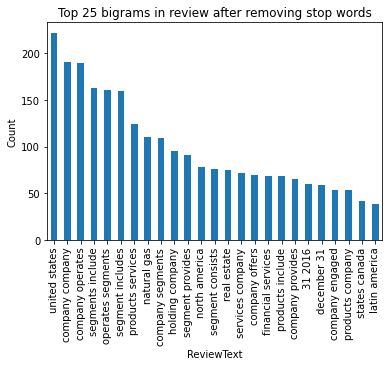

In [11]:
def get_top_n_bigram(corpus, n=None):
    vec = CountVectorizer(ngram_range=(2, 2), stop_words='english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]
common_words = get_top_n_bigram(df['text'], 25)
df4 = pd.DataFrame(common_words, columns = ['ReviewText' , 'count'])
df4.groupby('ReviewText').sum()['count'].sort_values(ascending=False).plot(
    kind='bar', ylabel='Count', title='Top 25 bigrams in review after removing stop words')

0.020045125864497318


c:\Users\Fabian\Desktop\Python\projects\Finance\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Volatility', ylabel='Density'>

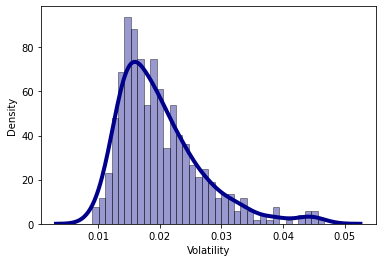

In [35]:
print(df['Volatility'].mean())
sns.distplot(df['Volatility'], hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

# Linear Regression

In [13]:
model = linear_model.LinearRegression()
scoring = make_scorer(r2_score)
parameters = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}
grid_linear = GridSearchCV(model,parameters,scoring=scoring, cv=None)
grid_linear.fit(X_train, y_train)

grid_linear.best_params_


result = grid_linear.cv_results_

score=r2_score(y_test, grid_linear.best_estimator_.predict(X_test))

y_pred_linear=grid_linear.best_estimator_.predict(X_test)




In [14]:
print("Best Hyperparameters::\n{}".format(grid_linear.best_params_))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_linear))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_linear))
print('R2 score:',score)


Best Hyperparameters::
{'copy_X': True, 'fit_intercept': True, 'normalize': False}
Mean Absolute Error: 0.003979022986557623
Mean Squared Error: 3.0807505534054314e-05
R2 score: 0.46919099418999677


# Regression Tree

In [15]:
param_grid = {"min_samples_split": range(2, 1000),
              "max_depth": range(2, 10)
              
             }
                

In [16]:
scoring = make_scorer(r2_score)
grid_decisiontree = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid=param_grid, scoring=scoring, cv=None, refit=True)

grid_decisiontree.fit(X_train, y_train)
grid_decisiontree.best_params_


result = grid_decisiontree.cv_results_

score=r2_score(y_test, grid_decisiontree.best_estimator_.predict(X_test))

y_pred_tree=grid_decisiontree.best_estimator_.predict(X_test)

#B. In this next section, using cross-validation for performing GridSerach on the parameter 'min_samples_split', 
#then using the best estimator for scoring on the valiation/holdout set. 

In [17]:
print("Best Hyperparameters::\n{}".format(grid_decisiontree.best_params_))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred_tree))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred_tree))


Best Hyperparameters::
{'max_depth': 2, 'min_samples_split': 321}
Mean Absolute Error: 0.005070219695706446
Mean Squared Error: 4.292008602548739e-05


# Neural Network

In [18]:
X_train_keras = X_train.toarray()
X_train_keras.shape

(400, 10000)

In [19]:
callbacks_list = [
keras.callbacks.EarlyStopping(monitor='acc', patience=1,),
keras.callbacks.ModelCheckpoint(filepath='neural_network.h5', monitor='val_loss', save_best_only=True,)
]


text_input =  Input(shape= (X_train.shape[1],), dtype='float64')
x = layers.Flatten()(text_input)
x = layers.Dense(8, activation='relu')(x)
x = layers.Dense(4, activation='relu')(x)
x = layers.Dense(4, activation='relu')(x)
x = layers.Dense(4, activation='relu')(x)
output = layers.Dense(1)(x)

model = Model(text_input, output)
model.compile(optimizer='adam',
loss='mean_squared_error',
metrics=['mse'])


history = model.fit(X_train_keras, y_train, epochs=8, callbacks=callbacks_list, validation_split=0.1)

Epoch 1/8
12/12 [==============================] - 1s 24ms/step - loss: 1.3355e-04 - mse: 1.3355e-04 - val_loss: 6.4778e-05 - val_mse: 6.4778e-05
Epoch 2/8
12/12 [==============================] - 0s 7ms/step - loss: 4.1936e-05 - mse: 4.1936e-05 - val_loss: 6.4814e-05 - val_mse: 6.4814e-05
Epoch 3/8
12/12 [==============================] - 0s 7ms/step - loss: 2.5888e-05 - mse: 2.5888e-05 - val_loss: 5.6553e-05 - val_mse: 5.6553e-05
Epoch 4/8
12/12 [==============================] - 0s 7ms/step - loss: 1.6428e-05 - mse: 1.6428e-05 - val_loss: 5.2285e-05 - val_mse: 5.2285e-05
Epoch 5/8
12/12 [==============================] - 0s 7ms/step - loss: 9.5645e-06 - mse: 9.5645e-06 - val_loss: 5.7306e-05 - val_mse: 5.7306e-05
Epoch 6/8
12/12 [==============================] - 0s 9ms/step - loss: 7.1099e-06 - mse: 7.1099e-06 - val_loss: 5.1846e-05 - val_mse: 5.1846e-05
Epoch 7/8
12/12 [==============================] - 0s 10ms/step - loss: 6.1422e-06 - mse: 6.1422e-06 - val_loss: 5.6977e-05 - val

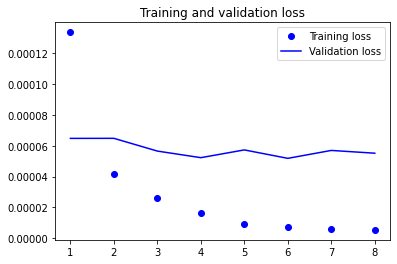

In [20]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [21]:
n_network = models.load_model('neural_network.h5')
print(n_network.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10000)]           0         
_________________________________________________________________
flatten (Flatten)            (None, 10000)             0         
_________________________________________________________________
dense (Dense)                (None, 8)                 80008     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 36        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 5     

In [22]:
test_loss, test_acc = n_network.evaluate(X_test.toarray(), y_test)
print(test_acc)

4/4 [==============================] - 0s 4ms/step - loss: 5.3848e-05 - mse: 5.3848e-05
5.384821997722611e-05


In [23]:
nn_predict = n_network.predict(X_test.toarray())
nn_mae = sklearn.metrics.mean_absolute_error(y_test, nn_predict)
nn_mse = sklearn.metrics.mean_squared_error(y_test, nn_predict)
nn_mape = sklearn.metrics.mean_absolute_percentage_error(y_test, nn_predict)

print(nn_mae,"\n",nn_mse,"\n",nn_mape)

0.004946801288605786 
 5.384821939485127e-05 
 0.21745688220237244


# Gradient Boosting

In [24]:
param_gb = {'learning_rate': [0.05, 0.1, 0.15], 'n_estimators': range(100,140,5)}

gb_grid = GridSearchCV(estimator=GradientBoostingRegressor(), param_grid=param_gb, cv=10, n_jobs=-1)
gb_grid = gb_grid.fit(X_train, y_train)

In [25]:
gb_predict = gb_grid.predict(X_test)
print(gb_grid.best_params_)

{'learning_rate': 0.15, 'n_estimators': 135}


In [26]:
gb_mae = sklearn.metrics.mean_absolute_error(y_test, gb_predict)
gb_mse = sklearn.metrics.mean_squared_error(y_test, gb_predict)
gb_mape = sklearn.metrics.mean_absolute_percentage_error(y_test, gb_predict)
print(gb_mae,"\n",gb_mse,"\n",gb_mape)

0.004487297271197057 
 4.0210964697289814e-05 
 0.21913556171827436


# Elastic Net

In [27]:
param_en = {'alpha': np.arange(0.1,1,0.1), "l1_ratio": np.arange(0.1,1,0.1)}

en_grid = GridSearchCV(estimator=ElasticNet(random_state = 0, positive=True), param_grid=param_en, cv=10, n_jobs=-1)
en_grid = en_grid.fit(X_train, y_train)

In [28]:
en_predict = en_grid.predict(X_test)
print(en_grid.best_params_)


{'alpha': 0.1, 'l1_ratio': 0.1}


In [29]:
en_mae = sklearn.metrics.mean_absolute_error(y_test, en_predict)
en_mse = sklearn.metrics.mean_squared_error(y_test, en_predict)
en_mape = sklearn.metrics.mean_absolute_percentage_error(y_test, en_predict)

print(en_mae,"\n",en_mse,"\n",en_mape)

0.005724198121762696 
 5.8554838551466446e-05 
 0.2836840298509443


# Mean

In [30]:
base_predict = [y_train.mean()]*100

base_mae = sklearn.metrics.mean_absolute_error(y_test, base_predict)
base_mse = sklearn.metrics.mean_squared_error(y_test, base_predict)
base_mape = sklearn.metrics.mean_absolute_percentage_error(y_test, base_predict)

print(base_mae,"\n",base_mse,"\n",base_mape)

0.005724198121762696 
 5.8554838551466446e-05 
 0.2836840298509443


# Results

MAE (Mean Absolute Error) output is non-negative floating point. The best value is 0.0.

MSE (Mean Squared Error) is a non-negative floating point value (the best value is 0.0), or an array of floating point values, one for each individual target.

MAPE output is non-negative floating point. The best value is 0.0. But note the fact that bad predictions can lead to arbitarily large MAPE values, especially if some y_true values are very close to zero. Note that we return a large value instead of inf when y_true is zero.

In [36]:
predictions = [base_predict, gb_predict, en_predict, y_pred_linear, y_pred_tree, nn_predict]
classifier = ["base", "Gradientboosting", "Elastic Net", "OLS", "Decision Tree", "Neural Network"]
mae = []
mse = []
mape = []

for y in predictions:
    mae.append(sklearn.metrics.mean_absolute_error(y_test, y))
    mse.append(sklearn.metrics.mean_squared_error(y_test, y))
    mape.append(f"{sklearn.metrics.mean_absolute_percentage_error(y_test, y)*100:.2f}%")
    


In [37]:
results=pd.DataFrame([mae,mse,mape], columns=classifier, index=['MAE','MSE','MAPE'])
results

,base,Gradientboosting,Elastic Net,OLS,Decision Tree,Neural Network
MAE,0.005724,0.004487,0.005724,0.003979,0.00507,0.004947
MSE,0.000059,0.00004,0.000059,0.000031,0.000043,0.000054
MAPE,28.37%,21.91%,28.37%,19.74%,25.84%,21.75%


In [39]:
results.to_excel("results.xlsx")